# Hyperparamter Optimization

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [4]:
data = pd.read_csv("C:/Users/user 1/Documents/Fall_Spring_2022-2023/Course_Work/Fall_2023/Practical_ML/Warmup/Data.csv")

data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [6]:
X


array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [7]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### ML Classifiers

### Randomized SearchCV

#### Logistic Regression model 

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score

cv = KFold(n_splits=10, random_state=42, shuffle = True)

In [11]:
from sklearn.linear_model import LogisticRegression
mod_Lr = LogisticRegression(solver = 'liblinear', max_iter = 50, C = 0.1)

scores = cross_val_score(mod_Lr, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)
for score in scores:
    print("Accuracy of this fold is: ", np.mean(scores))

mod_Lr.fit(X_train, y_train)
y_pred = mod_Lr.predict(X_test)
y_train_pred = mod_Lr.predict(X_train)

print("Accuracy of Train Data: ", accuracy_score(y_train, y_train_pred)*100) 
print("Accuracy of Test Data: ", accuracy_score(y_test, y_pred)*100)


Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of Train Data:  97.8515625
Accuracy of Test Data:  95.32163742690058


##### Hyperparameter Tuning of LR

##### Tuning 1

In [25]:
parameters = [{
                "C" : [0.1, 0.2,0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1],
               "solver": ["lbfgs", "newton-cg", "liblinear"],
               "max_iter" : [50, 100, 200, 1000, 2500, 5000]
       }]

random_search= RandomizedSearchCV(mod_Lr, param_distributions = parameters, scoring = "accuracy", cv = 10, n_jobs = -1)

random_search.fit(X_train,y_train)
best_accuracy = random_search.best_score_
best_paramters = random_search.best_params_

print("Best Accuracy: {:.2f} %".format((best_accuracy)*100))
print("Best Paramters:",best_paramters)

Best Accuracy: 97.85 %
Best Paramters: {'solver': 'liblinear', 'max_iter': 50, 'C': 0.1}


[[103   4]
 [  4  60]]
[[330   7]
 [  4 171]]


<Axes: >

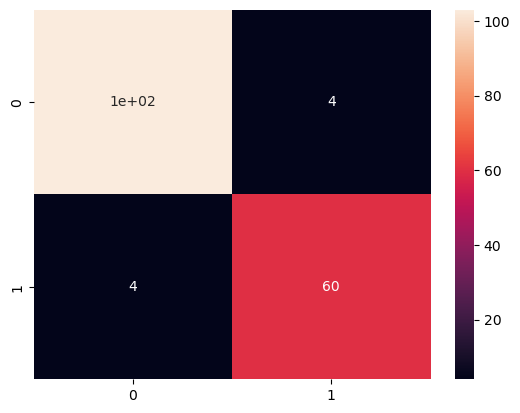

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm1 = confusion_matrix(y_train, y_train_pred)
print(cm)
print(cm1)

sns.heatmap(cm, annot= True)

##### Tuning 2

In [31]:
from sklearn.linear_model import LogisticRegression
mod_Lr = LogisticRegression(solver = 'newton-cg', max_iter = 5000, C = 0.1)

scores = cross_val_score(mod_Lr, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)
for score in scores:
    print("Accuracy of this fold is: ", np.mean(scores))

mod_Lr.fit(X_train, y_train)
y_pred1 = mod_Lr.predict(X_test)
y_train_pred1 = mod_Lr.predict(X_train)

print("Accuracy of Train Data: ", accuracy_score(y_train, y_train_pred1)*100) 
print("Accuracy of Test Data: ", accuracy_score(y_test, y_pred1)*100)

Accuracy of this fold is:  0.9708521870286576
Accuracy of this fold is:  0.9708521870286576
Accuracy of this fold is:  0.9708521870286576
Accuracy of this fold is:  0.9708521870286576
Accuracy of this fold is:  0.9708521870286576
Accuracy of this fold is:  0.9708521870286576
Accuracy of this fold is:  0.9708521870286576
Accuracy of this fold is:  0.9708521870286576
Accuracy of this fold is:  0.9708521870286576
Accuracy of this fold is:  0.9708521870286576
Accuracy of Train Data:  97.8515625
Accuracy of Test Data:  94.73684210526315


In [29]:
parameters = [{
                "C" : [0.1, 0.2,0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7],
               "solver": ["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
               "max_iter" : [50, 100, 200, 1000, 2500, 5000]
       }]

random_search= RandomizedSearchCV(mod_Lr, param_distributions = parameters, scoring = "accuracy", cv = 10, n_jobs = -1)

random_search.fit(X_train,y_train)
best_accuracy = random_search.best_score_
best_paramters = random_search.best_params_

print("Best Accuracy: {:.2f} %".format((best_accuracy)*100))
print("Best Paramters:",best_paramters)

Best Accuracy: 97.26 %
Best Paramters: {'solver': 'newton-cg', 'max_iter': 5000, 'C': 0.1}


[[103   4]
 [  5  59]]
[[332   5]
 [  6 169]]


<Axes: >

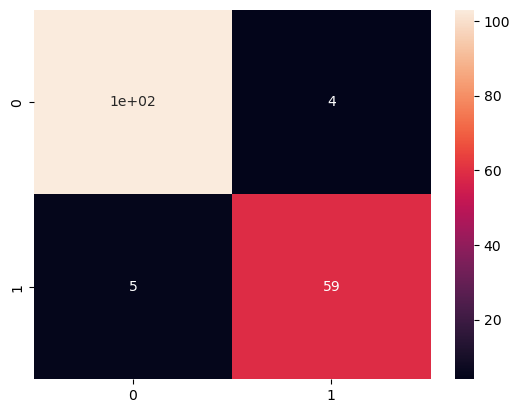

In [32]:
cm = confusion_matrix(y_test, y_pred1)
cm1 = confusion_matrix(y_train, y_train_pred1)
print(cm)
print(cm1)

sns.heatmap(cm, annot= True)

##### Support Vector Machines

In [35]:
from sklearn import svm
mod_SVC = svm.SVC(kernel = 'linear', gamma = 0.5, C = 0.8)

scores = cross_val_score(mod_SVC, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)
for score in scores:
    print("Accuracy of this fold is: ", np.mean(scores))
    
mod_SVC = mod_SVC.fit(X_train, y_train)
y_pred = mod_SVC.predict(X_test)
y_train_pred = mod_SVC.predict(X_train)
print("Accuracy of Train Data: ", accuracy_score(y_train, y_train_pred)*100) 
print("Accuracy of Test Data: ", accuracy_score(y_test, y_pred)*100) 

Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of Train Data:  97.8515625
Accuracy of Test Data:  94.15204678362574


In [34]:
parameters = [{"C" : [0.1, 0.2,0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1],
               "kernel": ["linear", "rbf", "sigmoid"],
               "gamma": [(0.01 + x / 100) for x in range(10, 90)]
       }]

random_search9 = RandomizedSearchCV(mod_SVC, param_distributions = parameters, n_iter = 5, scoring = "accuracy", cv = 10, n_jobs = -1)

random_search9.fit(X_train,y_train)
best_accuracy = random_search9.best_score_
best_paramters = random_search9.best_params_

print("Best Accuracy: {:.2f} %".format((best_accuracy)*100))
print("Best Paramters:",best_paramters)

Best Accuracy: 97.27 %
Best Paramters: {'kernel': 'linear', 'gamma': 0.5, 'C': 0.8}


[[102   5]
 [  5  59]]
[[330   7]
 [  4 171]]


<Axes: >

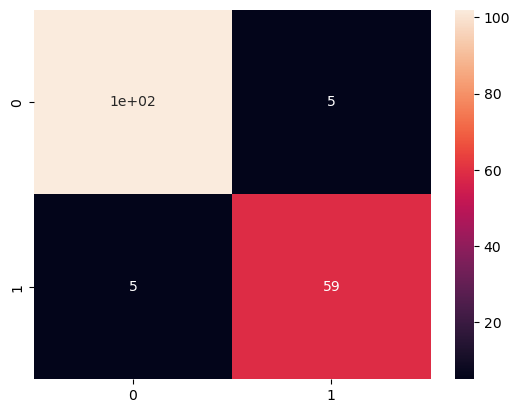

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_train, y_train_pred)
print(cm)
print(cm2)
sns.heatmap(cm, annot = True)

##### Tuning 2

In [40]:
from sklearn import svm
mod_SVC = svm.SVC(kernel = 'linear', gamma = 0.6, C = 1)

scores = cross_val_score(mod_SVC, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)
for score in scores:
    print("Accuracy of this fold is: ", np.mean(scores))
    
mod_SVC = mod_SVC.fit(X_train, y_train)
y_pred = mod_SVC.predict(X_test)
y_train_pred = mod_SVC.predict(X_train)
print("Accuracy of Train Data: ", accuracy_score(y_train, y_train_pred)*100) 
print("Accuracy of Test Data: ", accuracy_score(y_test, y_pred)*100) 

Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of this fold is:  0.9688536953242834
Accuracy of Train Data:  97.8515625
Accuracy of Test Data:  94.15204678362574


In [39]:
parameters = [{"C" : [0.1, 0.2,0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1],
               "kernel": ["linear", "rbf", "sigmoid"],
               "gamma": [(0.01 + x / 100) for x in range(10, 200)]
       }]

random_search9 = RandomizedSearchCV(mod_SVC, param_distributions = parameters, n_iter = 5, scoring = "accuracy", cv = 10, n_jobs = -1)

random_search9.fit(X_train,y_train)
best_accuracy = random_search9.best_score_
best_paramters = random_search9.best_params_

print("Best Accuracy: {:.2f} %".format((best_accuracy)*100))
print("Best Paramters:",best_paramters)

Best Accuracy: 97.27 %
Best Paramters: {'kernel': 'linear', 'gamma': 0.6, 'C': 1}


#### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
mod_DT = DecisionTreeClassifier(min_samples_split = 10, min_samples_leaf = 6, criterion = "gini",
                                 random_state = 0)

scores = cross_val_score(mod_DT, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)
for score in scores:
    print("Accuracy of this fold is: ", np.mean(scores))

mod_DT.fit(X_train, y_train)
y_pred1 = mod_DT.predict(X_test)
y_train_pred1 = mod_DT.predict(X_train)

print("Accuracy of Train Data: ", accuracy_score(y_train, y_train_pred1)*100) 
print("Accuracy of Test Data: ", accuracy_score(y_test, y_pred1)*100)

Accuracy of this fold is:  0.93763197586727
Accuracy of this fold is:  0.93763197586727
Accuracy of this fold is:  0.93763197586727
Accuracy of this fold is:  0.93763197586727
Accuracy of this fold is:  0.93763197586727
Accuracy of this fold is:  0.93763197586727
Accuracy of this fold is:  0.93763197586727
Accuracy of this fold is:  0.93763197586727
Accuracy of this fold is:  0.93763197586727
Accuracy of this fold is:  0.93763197586727
Accuracy of Train Data:  97.265625
Accuracy of Test Data:  92.98245614035088


##### Hyperparamter Tuning of Decision Tree

In [43]:
parameters = [{"min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "min_samples_split": [int(x) for x in np.linspace(10, 200, 5)],
              "criterion": ["gini", "entropy"]}]
random_search1 = RandomizedSearchCV(mod_DT, param_distributions = parameters, scoring = "accuracy", 
                                   cv = 10, n_jobs = -1)

random_search1.fit(X_train,y_train)
best_accuracy = random_search1.best_score_
best_paramters = random_search1.best_params_

print("Best Accuracy: {:.2f} %".format((best_accuracy)*100))
print("Best Paramters:",best_paramters)

Best Accuracy: 95.12 %
Best Paramters: {'min_samples_split': 10, 'min_samples_leaf': 6, 'criterion': 'gini'}


[[103   4]
 [  8  56]]
[[332   5]
 [  9 166]]


<Axes: >

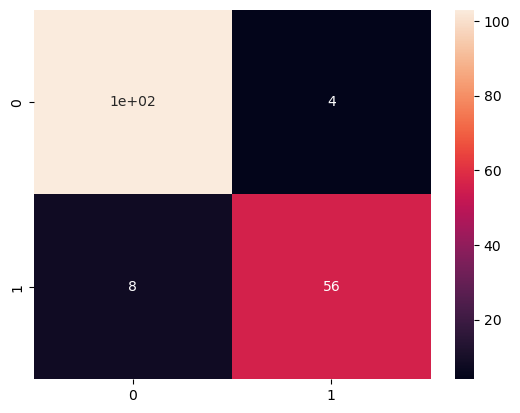

In [45]:
cm3 = confusion_matrix(y_test, y_pred1)
cm4 = confusion_matrix(y_train, y_train_pred1)
print(cm3)
print(cm4)

sns.heatmap(cm3, annot = True)

In [48]:
from sklearn.tree import DecisionTreeClassifier
mod_DT = DecisionTreeClassifier(min_samples_split = 10, min_samples_leaf = 15, criterion = "entropy",
                                 random_state = 0)

scores = cross_val_score(mod_DT, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)
for score in scores:
    print("Accuracy of this fold is: ", np.mean(scores))

mod_DT.fit(X_train, y_train)
y_pred1 = mod_DT.predict(X_test)
y_train_pred1 = mod_DT.predict(X_train)

print("Accuracy of Train Data: ", accuracy_score(y_train, y_train_pred1)*100) 
print("Accuracy of Test Data: ", accuracy_score(y_test, y_pred1)*100)

Accuracy of this fold is:  0.9591251885369532
Accuracy of this fold is:  0.9591251885369532
Accuracy of this fold is:  0.9591251885369532
Accuracy of this fold is:  0.9591251885369532
Accuracy of this fold is:  0.9591251885369532
Accuracy of this fold is:  0.9591251885369532
Accuracy of this fold is:  0.9591251885369532
Accuracy of this fold is:  0.9591251885369532
Accuracy of this fold is:  0.9591251885369532
Accuracy of this fold is:  0.9591251885369532
Accuracy of Train Data:  96.2890625
Accuracy of Test Data:  92.98245614035088


In [47]:
parameters = [{"min_samples_leaf": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              "min_samples_split": [int(x) for x in np.linspace(10, 200, 5)],
              "criterion": ["gini", "entropy", "log_loss"]}]
random_search1 = RandomizedSearchCV(mod_DT, param_distributions = parameters, scoring = "accuracy", 
                                   cv = 10, n_jobs = -1)

random_search1.fit(X_train,y_train)
best_accuracy = random_search1.best_score_
best_paramters = random_search1.best_params_

print("Best Accuracy: {:.2f} %".format((best_accuracy)*100))
print("Best Paramters:",best_paramters)

Best Accuracy: 95.50 %
Best Paramters: {'min_samples_split': 10, 'min_samples_leaf': 15, 'criterion': 'entropy'}


[[103   4]
 [  8  56]]
[[104   3]
 [  9  55]]


<Axes: >

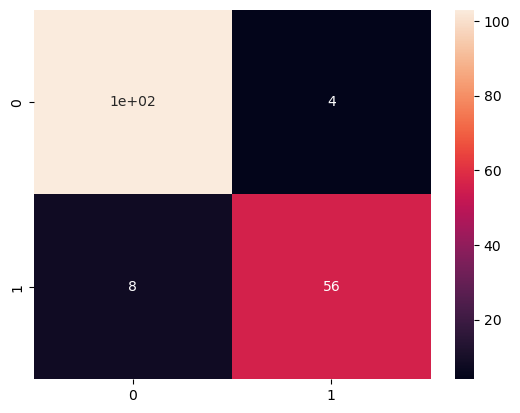

In [49]:
cm4 = confusion_matrix(y_test, y_pred1)
cm5 = confusion_matrix(y_train, y_train_pred1)
print(cm3)
print(cm4)

sns.heatmap(cm3, annot = True)

#### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
mod_RF = RandomForestClassifier(n_estimators = 300, criterion = "gini", 
                                min_samples_split = 200, min_samples_leaf = 8, random_state = 0)


scores = cross_val_score(mod_RF, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)
for score in scores:
    print("Accuracy of this fold is: ", np.mean(scores))
    
mod_RF.fit(X_train, y_train)
y_pred2 = mod_RF.predict(X_test)
y_train_pred2 = mod_RF.predict(X_train)

print("Accuracy of Train Data: ", accuracy_score(y_train, y_train_pred2)*100) 
print("Accuracy of Test Data: ", accuracy_score(y_test, y_pred2)*100)

Accuracy of this fold is:  0.9727752639517346
Accuracy of this fold is:  0.9727752639517346
Accuracy of this fold is:  0.9727752639517346
Accuracy of this fold is:  0.9727752639517346
Accuracy of this fold is:  0.9727752639517346
Accuracy of this fold is:  0.9727752639517346
Accuracy of this fold is:  0.9727752639517346
Accuracy of this fold is:  0.9727752639517346
Accuracy of this fold is:  0.9727752639517346
Accuracy of this fold is:  0.9727752639517346
Accuracy of Train Data:  97.4609375
Accuracy of Test Data:  94.73684210526315


In [57]:
from sklearn.model_selection import RandomizedSearchCV

parameters = [{"min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "min_samples_split": [int(x) for x in np.linspace(10, 200, 5)],
              "n_estimators": [100,150,200,300,400,500,600,700,800,900, 1000, 2000, 3000, 3300],
              "criterion": ["gini", "entropy"]}]
random_search = RandomizedSearchCV(mod_RF, param_distributions = parameters, scoring = "accuracy", 
                                   cv = 10, n_jobs = -1)

random_search.fit(X_train,y_train)
best_accuracy = random_search.best_score_
best_paramters = random_search.best_params_

print("Best Accuracy: {:.2f} %".format((best_accuracy)*100))
print("Best Paramters:",best_paramters)

Best Accuracy: 97.46 %
Best Paramters: {'n_estimators': 300, 'min_samples_split': 200, 'min_samples_leaf': 8, 'criterion': 'gini'}


[[102   5]
 [  4  60]]
[[326  11]
 [  2 173]]


<Axes: >

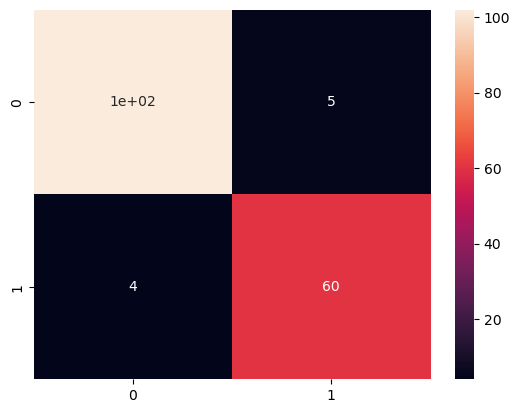

In [59]:
cm5 = confusion_matrix(y_test, y_pred2)
cm6 = confusion_matrix(y_train, y_train_pred2)
print(cm5)
print(cm6)

sns.heatmap(cm5, annot = True)

### Bayesian Optimization

In [2]:
pip install scikit-optimize

     -------------------------------------- 100.3/100.3 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
mod_Lr_BO = LogisticRegression(C = 0.1, max_iter = 7000, solver = "liblinear")

scores = cross_val_score(mod_Lr_BO, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)
for score in scores:
    print("Accuracy of this fold is: ", np.mean(scores))
    
mod_Lr_BO.fit(X_train, y_train)
y_pred3 = mod_Lr_BO.predict(X_test)
y_train_pred3 = mod_Lr_BO.predict(X_train)

print("Accuracy of Train Data: ", accuracy_score(y_train, y_train_pred3)*100) 
print("Accuracy of Test Data: ", accuracy_score(y_test, y_pred3)*100)

Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of this fold is:  0.9766214177978885
Accuracy of Train Data:  97.8515625
Accuracy of Test Data:  95.32163742690058


In [61]:
search_space = [{
                "C" : [0.1, 0.2,0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1],
               "solver": ["lbfgs", "newton-cg", "liblinear"],
               "max_iter" : [50, 100, 200, 1000, 2500, 5000, 5500, 6000, 6500, 7000, 8000, 9000]
       }]

Bayes_search = BayesSearchCV(mod_Lr_BO, search_space, scoring = "accuracy", cv = 10, n_jobs = -1)

Bayes_search.fit(X_train,y_train)
best_accuracy = Bayes_search.best_score_
best_paramters = Bayes_search.best_params_

print("Best Accuracy: {:.2f} %".format((best_accuracy)*100))
print("Best Paramters:",best_paramters)

Best Accuracy: 97.85 %
Best Paramters: OrderedDict([('C', 0.1), ('max_iter', 7000), ('solver', 'liblinear')])


[[103   4]
 [  4  60]]
[[330   7]
 [  4 171]]


<Axes: >

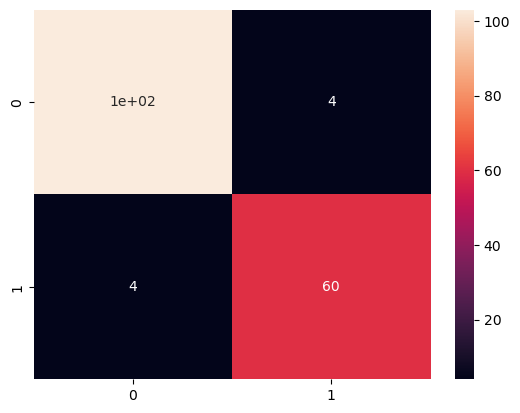

In [64]:
cm5 = confusion_matrix(y_test, y_pred3)
cm6 = confusion_matrix(y_train, y_train_pred3)
print(cm5)
print(cm6)

sns.heatmap(cm5, annot = True)

In [68]:
from sklearn import svm


mod_SVC_BO = svm.SVC(C = 0.8, gamma = 0.18, kernel = "rbf", random_state = 42)

scores = cross_val_score(mod_SVC_BO, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)
for score in scores:
    print("Accuracy of this fold is: ", np.mean(scores))
    
mod_SVC = mod_SVC.fit(X_train, y_train)
y_pred3 = mod_SVC.predict(X_test)
y_train_pred3 = mod_SVC.predict(X_train)
print("Accuracy of Train Data: ", accuracy_score(y_train, y_train_pred3)*100) 
print("Accuracy of Test Data: ", accuracy_score(y_test, y_pred3)*100) 

Accuracy of this fold is:  0.966892911010558
Accuracy of this fold is:  0.966892911010558
Accuracy of this fold is:  0.966892911010558
Accuracy of this fold is:  0.966892911010558
Accuracy of this fold is:  0.966892911010558
Accuracy of this fold is:  0.966892911010558
Accuracy of this fold is:  0.966892911010558
Accuracy of this fold is:  0.966892911010558
Accuracy of this fold is:  0.966892911010558
Accuracy of this fold is:  0.966892911010558
Accuracy of Train Data:  97.8515625
Accuracy of Test Data:  94.15204678362574


In [66]:
search_space = [{"C" : [0.1, 0.2,0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1],
               "kernel": ["linear", "rbf", "sigmoid"],
               "gamma": [(0.01 + x / 100) for x in range(10, 90)]
       }]

Bayes_search1 = BayesSearchCV(mod_SVC_BO, search_space, n_iter = 5, scoring = "accuracy", cv = 10, n_jobs = -1)

Bayes_search1.fit(X_train,y_train)
best_accuracy = Bayes_search1.best_score_
best_paramters = Bayes_search1.best_params_

print("Best Accuracy: {:.2f} %".format((best_accuracy)*100))
print("Best Paramters:",best_paramters)

Best Accuracy: 97.46 %
Best Paramters: OrderedDict([('C', 0.3), ('gamma', 0.87), ('kernel', 'sigmoid')])


[[102   5]
 [  5  59]]
[[330   7]
 [  4 171]]


<Axes: >

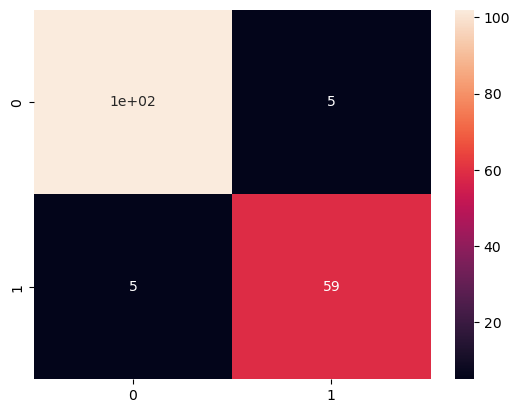

In [69]:
cm6 = confusion_matrix(y_test, y_pred3)
cm7 = confusion_matrix(y_train, y_train_pred3)
print(cm6)
print(cm7)

sns.heatmap(cm6, annot = True)

In [76]:
from sklearn.tree import DecisionTreeClassifier

#min_samples_split = 10, min_samples_leaf = 4, criterion = "gini",
#                                random_state = 0
mod_DT_BO = DecisionTreeClassifier(min_samples_split = 10, min_samples_leaf = 3, criterion = "entropy",
                                random_state = 0)

scores = cross_val_score(mod_DT_BO, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)
for score in scores:
    print("Accuracy of this fold is: ", np.mean(scores))
    
mod_DT.fit(X_train, y_train)
y_pred3 = mod_DT.predict(X_test)
y_train_pred3 = mod_DT.predict(X_train)

print("Accuracy of Train Data: ", accuracy_score(y_train, y_train_pred3)*100) 
print("Accuracy of Test Data: ", accuracy_score(y_test, y_pred3)*100)

Accuracy of this fold is:  0.9533182503770739
Accuracy of this fold is:  0.9533182503770739
Accuracy of this fold is:  0.9533182503770739
Accuracy of this fold is:  0.9533182503770739
Accuracy of this fold is:  0.9533182503770739
Accuracy of this fold is:  0.9533182503770739
Accuracy of this fold is:  0.9533182503770739
Accuracy of this fold is:  0.9533182503770739
Accuracy of this fold is:  0.9533182503770739
Accuracy of this fold is:  0.9533182503770739
Accuracy of Train Data:  100.0
Accuracy of Test Data:  95.90643274853801


In [75]:
search_space = [{"min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "min_samples_split": [int(x) for x in np.linspace(10, 200, 5)],
              "criterion": ["gini", "entropy"]}]
Bayes_search2 = BayesSearchCV(mod_DT_BO, search_space, scoring = "accuracy", cv = 10, n_jobs = -1)

Bayes_search2.fit(X_train,y_train)
best_accuracy = Bayes_search2.best_score_
best_paramters = Bayes_search2.best_params_

print("Best Accuracy: {:.2f} %".format((best_accuracy)*100))
print("Best Paramters:",best_paramters)

C:\Users\user 1\anaconda3\New_Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user 1\anaconda3\New_Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user 1\anaconda3\New_Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user 1\anaconda3\New_Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user 1\anaconda3\New_Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point befor

Best Accuracy: 95.90 %
Best Paramters: OrderedDict([('criterion', 'entropy'), ('min_samples_leaf', 3), ('min_samples_split', 10)])


In [79]:
from sklearn.ensemble import RandomForestClassifier
mod_RF_BO = RandomForestClassifier(n_estimators = 700, criterion = "entropy", 
                                min_samples_split = 105, min_samples_leaf = 6, random_state = 0)

scores = cross_val_score(mod_RF_BO, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)
for score in scores:
    print("Accuracy of this fold is: ", np.mean(scores))
    
mod_RF.fit(X_train, y_train)
y_pred4 = mod_RF.predict(X_test)
y_train_pred4 = mod_RF.predict(X_train)

print("Accuracy of Train Data: ", accuracy_score(y_train, y_train_pred4)*100) 
print("Accuracy of Test Data: ", accuracy_score(y_test, y_pred4)*100)

Accuracy of this fold is:  0.9728129713423831
Accuracy of this fold is:  0.9728129713423831
Accuracy of this fold is:  0.9728129713423831
Accuracy of this fold is:  0.9728129713423831
Accuracy of this fold is:  0.9728129713423831
Accuracy of this fold is:  0.9728129713423831
Accuracy of this fold is:  0.9728129713423831
Accuracy of this fold is:  0.9728129713423831
Accuracy of this fold is:  0.9728129713423831
Accuracy of this fold is:  0.9728129713423831
Accuracy of Train Data:  97.4609375
Accuracy of Test Data:  94.73684210526315


In [78]:
search_space = [{"min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "min_samples_split": [int(x) for x in np.linspace(10, 200, 5)],
              "n_estimators": [100,150,200,300,400,500,600,700,800,900, 1000, 2000, 3000, 3300],
              "criterion": ["gini", "entropy"]}]
Bayes_search3 = BayesSearchCV(mod_RF_BO, search_space, scoring = "accuracy", cv = 10, n_jobs = -1)

Bayes_search3.fit(X_train,y_train)
best_accuracy = Bayes_search3.best_score_
best_paramters = Bayes_search3.best_params_

print("Best Accuracy: {:.2f} %".format((best_accuracy)*100))
print("Best Paramters:",best_paramters)

C:\Users\user 1\anaconda3\New_Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user 1\anaconda3\New_Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user 1\anaconda3\New_Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user 1\anaconda3\New_Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\user 1\anaconda3\New_Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point befor

Best Accuracy: 97.46 %
Best Paramters: OrderedDict([('criterion', 'entropy'), ('min_samples_leaf', 6), ('min_samples_split', 105), ('n_estimators', 700)])


##### Discussions

In [ ]:
# Results

# Randomized SearchCV results

#   ML Algorithms                      Performance Comparison
                                   #Train            # Test

# Logistic Regression               98.05            94.74    
# Support Vector Machines           97.85            95.32
# Decision Tree                     97.85            95.32
# Random Forest                     97.66            95.91


# Bayesian SearchCV results

#   ML Algorithms                      Performance Comparison
                                   #Train            # Test

# Logistic Regression               97.46            93.57    
# Support Vector Machines           99.61            94.74
# Decision Tree                     97.85            95.85
# Random Forest                     97.46            93.57

In [ ]:
# The dataset used in this classification problem is also from one of the machine learning tutorial I did on Udemy. 
# Here is a link to the course "https://www.udemy.com/course/machinelearning/"
# In this classification modeling, four machine learning models were implemented, the logistic regression, 
# Support Vector Machines, decision tree classifier, and the random forest classifier.

# Comparing the performances of the models using both RandomizedSearchCV and BayesSearchCV, the models performed 
# almost the same. However, the Logistic regression and Random Forest models performed better using the RandomizedSearchCV
# when compared to using the Bayesian SearchCV for HPO.